# Examples of the pyrankability package

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
import pandas as pd
import numpy as np
import copy
import os

In [3]:
import sys
sys.path.insert(0,".")

In [4]:
import pyrankability

## Simple examples

In [5]:
n=8
D=np.zeros((n,n))
D[np.triu_indices(n,1)]=1
D[[5,3,7]] = 1-D[[5,3,7]]
D

array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

### Hillside

In [6]:
k_hillside,details_hillside = pyrankability.hillside.bilp(D)
k_hillside

Academic license - for non-commercial use only


54

In [7]:
details_hillside['P']

[(0, 7, 1, 5, 2, 4, 3, 6)]

### LOP

In [8]:
k_lop,details_lop = pyrankability.lop.bilp(D)
k_lop

25.0

In [9]:
details_lop['P']

[(7, 0, 1, 2, 4, 6, 5, 3)]

### Multiple solutions with random restarts

In [10]:
k_hillside_10,details_hillside_10 = pyrankability.hillside.bilp(D,num_random_restarts=10)
k_hillside_10

Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpx0iww074/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

54

In [11]:
details_hillside_10['P']

[(0, 7, 1, 5, 2, 4, 3, 6),
 (0, 1, 7, 2, 5, 3, 4, 6),
 (0, 1, 7, 5, 2, 3, 4, 6),
 (0, 7, 1, 5, 2, 3, 4, 6),
 (0, 1, 7, 2, 5, 3, 4, 6),
 (0, 1, 7, 5, 2, 4, 3, 6),
 (0, 1, 7, 2, 5, 3, 4, 6),
 (0, 7, 1, 5, 2, 4, 3, 6),
 (0, 7, 1, 5, 2, 3, 4, 6),
 (0, 7, 1, 5, 2, 3, 4, 6),
 (0, 7, 1, 2, 5, 4, 3, 6)]

In [12]:
k_lop_10,details_lop_10 = pyrankability.lop.bilp(D,num_random_restarts=10)
k_lop_10

Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp66yj840q/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 column

25.0

In [13]:
details_lop_10['P']

[(7, 0, 1, 2, 4, 6, 5, 3),
 (0, 1, 7, 2, 4, 6, 5, 3),
 (7, 0, 1, 2, 5, 3, 4, 6),
 (7, 5, 3, 0, 1, 2, 4, 6),
 (7, 5, 3, 0, 1, 2, 4, 6),
 (7, 5, 0, 1, 2, 4, 3, 6),
 (0, 7, 5, 1, 2, 4, 6, 3),
 (0, 1, 2, 7, 5, 4, 6, 3),
 (0, 1, 2, 4, 6, 7, 5, 3),
 (0, 1, 2, 4, 7, 5, 3, 6),
 (7, 5, 0, 1, 2, 4, 6, 3)]

### Multiple solutions with pairs

In [14]:
k_hillside_10_paired,details_hillside_10_paired = pyrankability.hillside.bilp(D,num_random_restarts=10,find_pair=True)
k_hillside_10_paired

Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64 columns, 1128 nonzeros
Read MPS format model from file /tmp/tmpnrfh36kq/model.mps
Reading time = 0.00 seconds
lop: 400 rows, 64

54.0

In [15]:
details_hillside_10_paired.keys()

dict_keys(['Pfirst', 'P', 'x', 'objs', 'xs', 'pair_details'])

If you want to check out the second pair:

In [16]:
details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]

((0, 1, 7, 2, 5, 4, 3, 6), (0, 7, 1, 5, 2, 3, 4, 6))

Visualize it

/data/env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


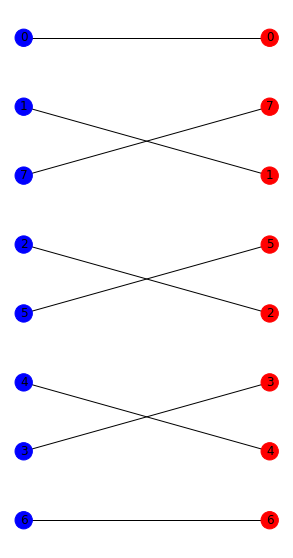

In [17]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_hillside_10_paired['P'][1],details_hillside_10_paired['pair_details']['P'][1]))

In [18]:
k_lop_10_paired,details_lop_10_paired = pyrankability.lop.bilp(D,num_random_restarts=10,find_pair=True)
k_lop_10_paired

Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 columns, 336 nonzeros
Read MPS format model from file /tmp/tmp8m_dm45a/model.mps
Reading time = 0.00 seconds
lop: 112 rows, 28 column

25.0

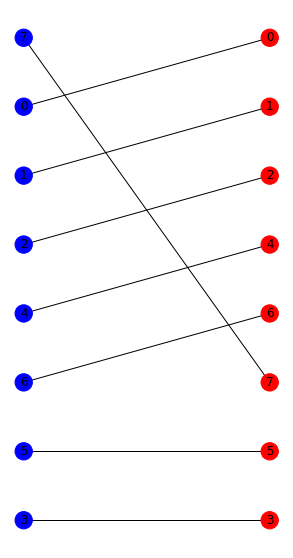

In [19]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(details_lop_10_paired['P'][1],details_lop_10_paired['pair_details']['P'][1]))

### Find the two most distant

In [20]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D,verbose=True)
k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0025 seconds
Start optimization 0
Optimize a model with 112 rows, 28 columns and 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 18.0000000
Found heuristic solution: objective 22.0000000
Presolve time: 0.00s
Presolved: 112 rows, 28 columns, 336 nonzeros
Variable types: 0 continuous, 28 integer (28 binary)

Root relaxation: objective 2.500000e+01, 7 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      25.0000000   25.00000  0.00%     -    0s

Explored 0 nodes (7 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 availa

25.0

In [21]:
details_two_distant

{'obj': 15.0,
 'k_x': 25.0,
 'k_y': 25.0,
 'perm_x': (7, 5, 3, 0, 1, 2, 4, 6),
 'perm_y': (0, 1, 2, 4, 6, 7, 5, 3),
 'x': array([[0, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [1, 1, 1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0]]),
 'y': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 1, 0, 0]]),
 'u': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]),
 'v': array([[0, 0, 0, 1, 0, 1, 0, 1],
        

In [24]:
k_two_distant,details_two_distant = pyrankability.hillside.bilp_two_most_distant(D,verbose=True)
k_two_distant

Updating opjective in 0.0027 seconds
Start optimization 0
Optimization in 0.0023 seconds
End optimization 0
Finished first optimization. Obj: 54
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Start optimization
Optimize a model with 282 rows, 112 columns and 890 nonzeros
Variable types: 0 continuous, 112 integer (112 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 282 rows and 112 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 3 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
Optimization in 0.0104 seconds
End optimization


54

In [25]:
details_two_distant

{'obj': 3.0,
 'k_x': 54.0,
 'k_y': 54.0,
 'perm_x': (0, 7, 1, 5, 2, 4, 3, 6),
 'perm_y': (0, 1, 7, 2, 5, 3, 4, 6),
 'x': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0]]),
 'y': array([[0, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0]]),
 'u': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]),
 'v': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [

### N-pal 13 example

In [27]:
data=open("../N-pal13").read().split("\n")
data=data[1:-1]
dt = []
for line in data:
    dt.append([int(k) for k in line.split()])
D_N_pal13 = pd.DataFrame(dt)
D_N_pal13

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,0,1,1,0,0,0,0,1,1,0,1
1,0,0,1,0,1,1,0,0,0,0,1,1,0
2,1,0,0,1,0,1,1,0,0,0,0,1,1
3,0,1,0,0,1,0,1,1,0,0,0,0,1
4,0,0,1,0,0,1,0,1,1,0,0,0,0
5,1,0,0,1,0,0,1,0,1,1,0,0,0
6,1,1,0,0,1,0,0,1,0,1,1,0,0
7,1,1,1,0,0,1,0,0,1,0,1,1,0
8,1,1,1,1,0,0,1,0,0,1,0,1,1
9,0,1,1,1,1,0,0,1,0,0,1,0,1


In [28]:
k_two_sim,details_two_sim = pyrankability.lop.bilp_two_most_similar(D_N_pal13.values,verbose=True)

k_two_sim

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0049 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.0000000
Found heuristic solution: objective 50.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.700000e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      57.0000000   57.00000  0.00%     -    0s

Explored 0 nodes (49 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 av

57.0

In [29]:
details_two_sim

{'obj': 4.0,
 'k_x': 57,
 'k_y': 57,
 'perm_x': (8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5),
 'perm_y': (8, 2, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 5),
 'x': array([[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]]),
 'y': array([[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
        

In [30]:
details_two_sim['perm_x'],details_two_sim['perm_y']

((8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5),
 (8, 2, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 5))

In [31]:
k_two_distant,details_two_distant = pyrankability.lop.bilp_two_most_distant(D_N_pal13.values,verbose=True)

k_two_distant

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0047 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.0000000
Found heuristic solution: objective 50.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.700000e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      57.0000000   57.00000  0.00%     -    0s

Explored 0 nodes (49 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 av

57.0

In [32]:
details_two_distant

{'obj': 34.0,
 'k_x': 57,
 'k_y': 57,
 'perm_x': (8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 'perm_y': (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4),
 'x': array([[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]]),
 'y': array([[0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       

For this example we've found the full P set:

In [33]:
details_two_distant['perm_x'],details_two_distant['perm_y']

((8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5),
 (7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4))

In [34]:
k_two_distant_jonad,details_two_distant_jonad = pyrankability.lop.bilp_two_most_distant_jonad(D_N_pal13.values,verbose=True)
k_two_distant_jonad

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Updating opjective in 0.0050 seconds
Start optimization 0
Optimize a model with 572 rows, 78 columns and 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 45.0000000
Found heuristic solution: objective 50.0000000
Presolve time: 0.00s
Presolved: 572 rows, 78 columns, 1716 nonzeros
Variable types: 0 continuous, 78 integer (78 binary)

Root relaxation: objective 5.700000e+01, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      57.0000000   57.00000  0.00%     -    0s

Explored 0 nodes (49 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 av

57.0

In [35]:
details_two_distant_jonad['perm_x'],details_two_distant_jonad['perm_y']

((7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4),
 (8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5))

In [36]:
def calc_con_dis(perm_x,perm_y):
    ncon = 0
    ndis = 0
    for i in range(len(perm_x)): # i is an item
        i_x = np.where(np.array(perm_x)==i)[0] # location of i in perm_x
        i_y = np.where(np.array(perm_y)==i)[0] # location of i in perm_y
        for j in range(i+1,len(perm_x)): # j is another item
            j_x = np.where(np.array(perm_x)==j)[0] # location of j in perm_x
            j_y = np.where(np.array(perm_y)==j)[0] # location of j in perm_y
            if i_x-j_x > 0 and i_y-j_y < 0:
                ndis += 1
            elif i_x-j_x < 0 and i_y-j_y > 0:
                ndis += 1
            elif i_x-j_x > 0 and i_y-j_y > 0:
                ncon += 1
            elif i_x-j_x < 0 and i_y-j_y < 0:
                ncon += 1
    return ncon, ndis

In [37]:
calc_con_dis(details_two_distant_jonad['perm_x'],details_two_distant_jonad['perm_y'])

(44, 34)

In [38]:
calc_con_dis(details_two_distant['perm_x'],details_two_distant['perm_y'])

(44, 34)

In [39]:
full_P = [[4, 10, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 7],
[4, 1, 12, 3, 9, 0, 6, 5, 11, 2, 8, 10, 7],
[4, 1, 6, 12, 3, 9, 0, 5, 11, 2, 8, 10, 7],
[4, 10, 1, 6, 12, 3, 9, 0, 5, 11, 2, 8, 7],
[5, 4, 10, 1, 6, 12, 3, 9, 0, 11, 2, 8, 7],
[5, 4, 10, 1, 12, 3, 9, 0, 6, 11, 2, 8, 7],
[5, 4, 10, 1, 7, 6, 12, 3, 9, 0, 11, 2, 8],
[5, 4, 10, 1, 7, 12, 3, 9, 0, 6, 11, 2, 8],
[5, 2, 4, 10, 1, 7, 12, 3, 9, 0, 6, 11, 8],
[5, 2, 4, 10, 1, 7, 6, 12, 3, 9, 0, 11, 8]]
for i in range(len(full_P)):
    full_P[i] = full_P[i][::-1]
full_P

[[7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4],
 [7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4],
 [7, 10, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 4],
 [7, 8, 2, 11, 5, 0, 9, 3, 12, 6, 1, 10, 4],
 [7, 8, 2, 11, 0, 9, 3, 12, 6, 1, 10, 4, 5],
 [7, 8, 2, 11, 6, 0, 9, 3, 12, 1, 10, 4, 5],
 [8, 2, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 5],
 [8, 2, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 5],
 [8, 11, 6, 0, 9, 3, 12, 7, 1, 10, 4, 2, 5],
 [8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5]]

In [40]:
len(full_P)

10

Find all concordant pairs and discordant pairs

In [41]:
uc=np.zeros((n,n))
vc=np.zeros((n,n))
ncons = np.zeros((len(full_P),len(full_P)))
ndiss = np.zeros((len(full_P),len(full_P)))
for k,perm_x in enumerate(full_P):
    for z,perm_y in enumerate(full_P):
        ncon = 0
        ndis = 0
        for i in range(n): # i is an item
            i_x = np.where(np.array(perm_x)==i)[0] # location of i in perm_x
            i_y = np.where(np.array(perm_y)==i)[0] # location of i in perm_y
            for j in range(i+1,n): # j is another item
                j_x = np.where(np.array(perm_x)==j)[0] # location of j in perm_x
                j_y = np.where(np.array(perm_y)==j)[0] # location of j in perm_y
                if i_x-j_x > 0 and i_y-j_y < 0:
                    vc[i,j] = 1
                    ndis += 1
                elif i_x-j_x < 0 and i_y-j_y > 0:
                    uc[i,j] = 1
                    ndis += 1
                elif i_x-j_x > 0 and i_y-j_y > 0:
                    ncon += 1
                elif i_x-j_x < 0 and i_y-j_y < 0:
                    ncon += 1
        ncons[k,z] = ncon
        ndiss[k,z] = ndis
ncons = pd.DataFrame(ncons).astype(int)
ndiss = pd.DataFrame(ndiss).astype(int)

In [42]:
ncons

,0,1,2,3,4,5,6,7,8,9
0,28,28,26,26,21,23,17,19,15,13
1,28,28,26,26,21,23,17,19,15,13
2,26,26,28,28,23,21,19,17,13,15
3,26,26,28,28,23,21,19,17,13,15
4,21,21,23,23,28,26,24,22,18,20
5,23,23,21,21,26,28,22,24,20,18
6,17,17,19,19,24,22,28,26,20,22
7,19,19,17,17,22,24,26,28,22,20
8,15,15,13,13,18,20,20,22,28,26
9,13,13,15,15,20,18,22,20,26,28


In [43]:
ndiss

,0,1,2,3,4,5,6,7,8,9
0,0,0,2,2,7,5,11,9,13,15
1,0,0,2,2,7,5,11,9,13,15
2,2,2,0,0,5,7,9,11,15,13
3,2,2,0,0,5,7,9,11,15,13
4,7,7,5,5,0,2,4,6,10,8
5,5,5,7,7,2,0,6,4,8,10
6,11,11,9,9,4,6,0,2,8,6
7,9,9,11,11,6,4,2,0,6,8
8,13,13,15,15,10,8,8,6,0,2
9,15,15,13,13,8,10,6,8,2,0


What is the best pair? Best in this case being the farthest away.

In [44]:
best_pair = ndiss.stack().idxmax()
best_pair

(0, 9)

In [45]:
print(full_P[best_pair[0]])
print(full_P[best_pair[1]])

[7, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 10, 4]
[8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5]


What did we find using our algorithm?

In [46]:
print(details_two_distant['perm_y'])
print(details_two_distant['perm_x'])

(7, 10, 8, 2, 11, 5, 6, 0, 9, 3, 12, 1, 4)
(8, 11, 0, 9, 3, 12, 6, 7, 1, 10, 4, 2, 5)


It's the same!

### How does hillside compare?

In [47]:
k_two_distant_hillside,details_two_distant_hillside = pyrankability.hillside.bilp_two_most_distant(D_N_pal13.values,verbose=True)

k_two_distant_hillside

Updating opjective in 0.0067 seconds
Start optimization 0
Optimization in 0.0075 seconds
End optimization 0
Finished first optimization. Obj: 436
Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Start optimization
Optimize a model with 1302 rows, 312 columns and 4024 nonzeros
Variable types: 0 continuous, 312 integer (312 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 1242 rows and 272 columns
Presolve time: 0.00s
Presolved: 60 rows, 40 columns, 180 nonzeros
Found heuristic solution: objective 16.0000000
Variable types: 0 continuous, 40 integer (40 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 8 (of 8 available processors)

Solution count 2: 16 6 

Optimal solution found (tolerance 1.00e-04)
Bes

436

In [48]:
print(details_two_distant_hillside['perm_y'])
print(details_two_distant_hillside['perm_x'])

(8, 11, 9, 7, 12, 10, 6, 2, 0, 5, 3, 1, 4)
(8, 7, 9, 11, 0, 2, 6, 10, 12, 1, 3, 5, 4)
